### 라이브러리 정의

In [1]:
### 데이터 처리
import pandas as pd

### 시각화 처리
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

### 통합 데이터 읽어들이기

In [2]:
### 데이터프레임 변수명 : df_bus_card_tot
file_path = "./02_data_all/df_bus_card_tot.csv"
df_bus_card_tot = pd.read_csv(file_path, sep=",")
df_bus_card_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842608 entries, 0 to 842607
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   승차시각        842608 non-null  object 
 1   하차시각        842608 non-null  object 
 2   승객연령        841683 non-null  object 
 3   승차정류장       842608 non-null  object 
 4   하차정류장       842608 non-null  object 
 5   기준년도        842608 non-null  int64  
 6   기준월         842608 non-null  int64  
 7   기준일         842608 non-null  int64  
 8   기준시간        842608 non-null  int64  
 9   기준분         842608 non-null  int64  
 10  버스내체류시간(분)  842608 non-null  float64
 11  승하차구간       842608 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 77.1+ MB


### 소주제별 현황 분석 및 시각화 하기

In [3]:
df_bus_card_tot["기준년도"].unique()
### 년도가 1개년도만 존재하기에 연도별 비교 대상이 없으므로,
# - 현황 분석에서는 제외...
# - 이러한 사항도 향후 분석 보고서에는 작성해야 합니다.
#   (왜, 연도에 대한 분석이 없는지에 대한 타당성 입증 자료로 사용됩니다.)

array([2020])

In [ ]:
"""
### 조별로 아래 내용 수행 후 : 구글드라이브에 -> 파일 제출 (x조.ipynb 형태로)

<주제 도출>
1. 버스 이용량 분석(필요한 컬럼 : "연도, 월, 일, 시간, 분", 승객연령, count 집계)
  - 연간 버스 이용량 분석
    (수집된 데이터 확인 결과 년도는 2020년 1개년도만 있기에 분석에서 제외) 
  - 월별 vs 일자별 버스 이용량 현황 분석(시각화 포함)
  - 일자별 vs 시간별 버스 이용량 현황 분석(시각화 포함)
  - 시간별 vs 분별 버스 이용량 현황 분석(시각화 포함)

2. 버스 내 체류시간 분석(필요한 컬럼 : "체류시간")
  - 조별로 체류시간을 이용해서 비교할 주제 정하기???(1개정도...)(시각화 포함)
  - 체류시간 = 하차시각 - 승차시각

3. 버스 승하차 구간별 버스내 체류시간 분석(필요한 컬럼 : "승하차구간")
  - 체류시간이 높은 구간을 기준으로 내림차수하여 급행 도입 가능한 구간 확인(시각화 포함)
"""

In [8]:
### 월 및 일자별 버스 이용량 현황 분석(시각화 포함)
# - 시각화 그래프 선정 : 히트맵
# - 히트맵은 3개의 데이터가 필요한 : index, column, value
# - 필요한 데이터 : 월, 일, 승객연령
df_bus_card_tot.head(1)

### 집계함수 사용
df_pivot = df_bus_card_tot.pivot_table(index  ="기준월",
                                        columns="기준일",
                                        values ="승객연령",
                                        aggfunc="count")
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,NaN,NaN
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,NaN,NaN,NaN,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


In [13]:
### NaN 데이터 처리 : 결측치 처리
# - NaN이 있는 모든 데이터를 0으로 대체하기
df_pivot = df_pivot.fillna(0)
df_pivot

기준일,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,9365.0,16164.0,16590.0,12530.0,9515.0,15474.0,12981.0,15785.0,16760.0,17495.0,...,17229.0,17399.0,9112.0,5923.0,7770.0,5468.0,14464.0,16034.0,15868.0,16186.0
2,11801.0,8523.0,15830.0,15488.0,14902.0,14376.0,15700.0,11358.0,8316.0,15582.0,...,5654.0,2898.0,5932.0,4469.0,5344.0,5417.0,5488.0,3757.0,0.0,0.0
3,2399.0,6538.0,5691.0,5976.0,5828.0,6150.0,4111.0,2826.0,6879.0,5336.0,...,0.0,0.0,0.0,131.0,2889.0,4976.0,3868.0,1241.0,5143.0,2487.0


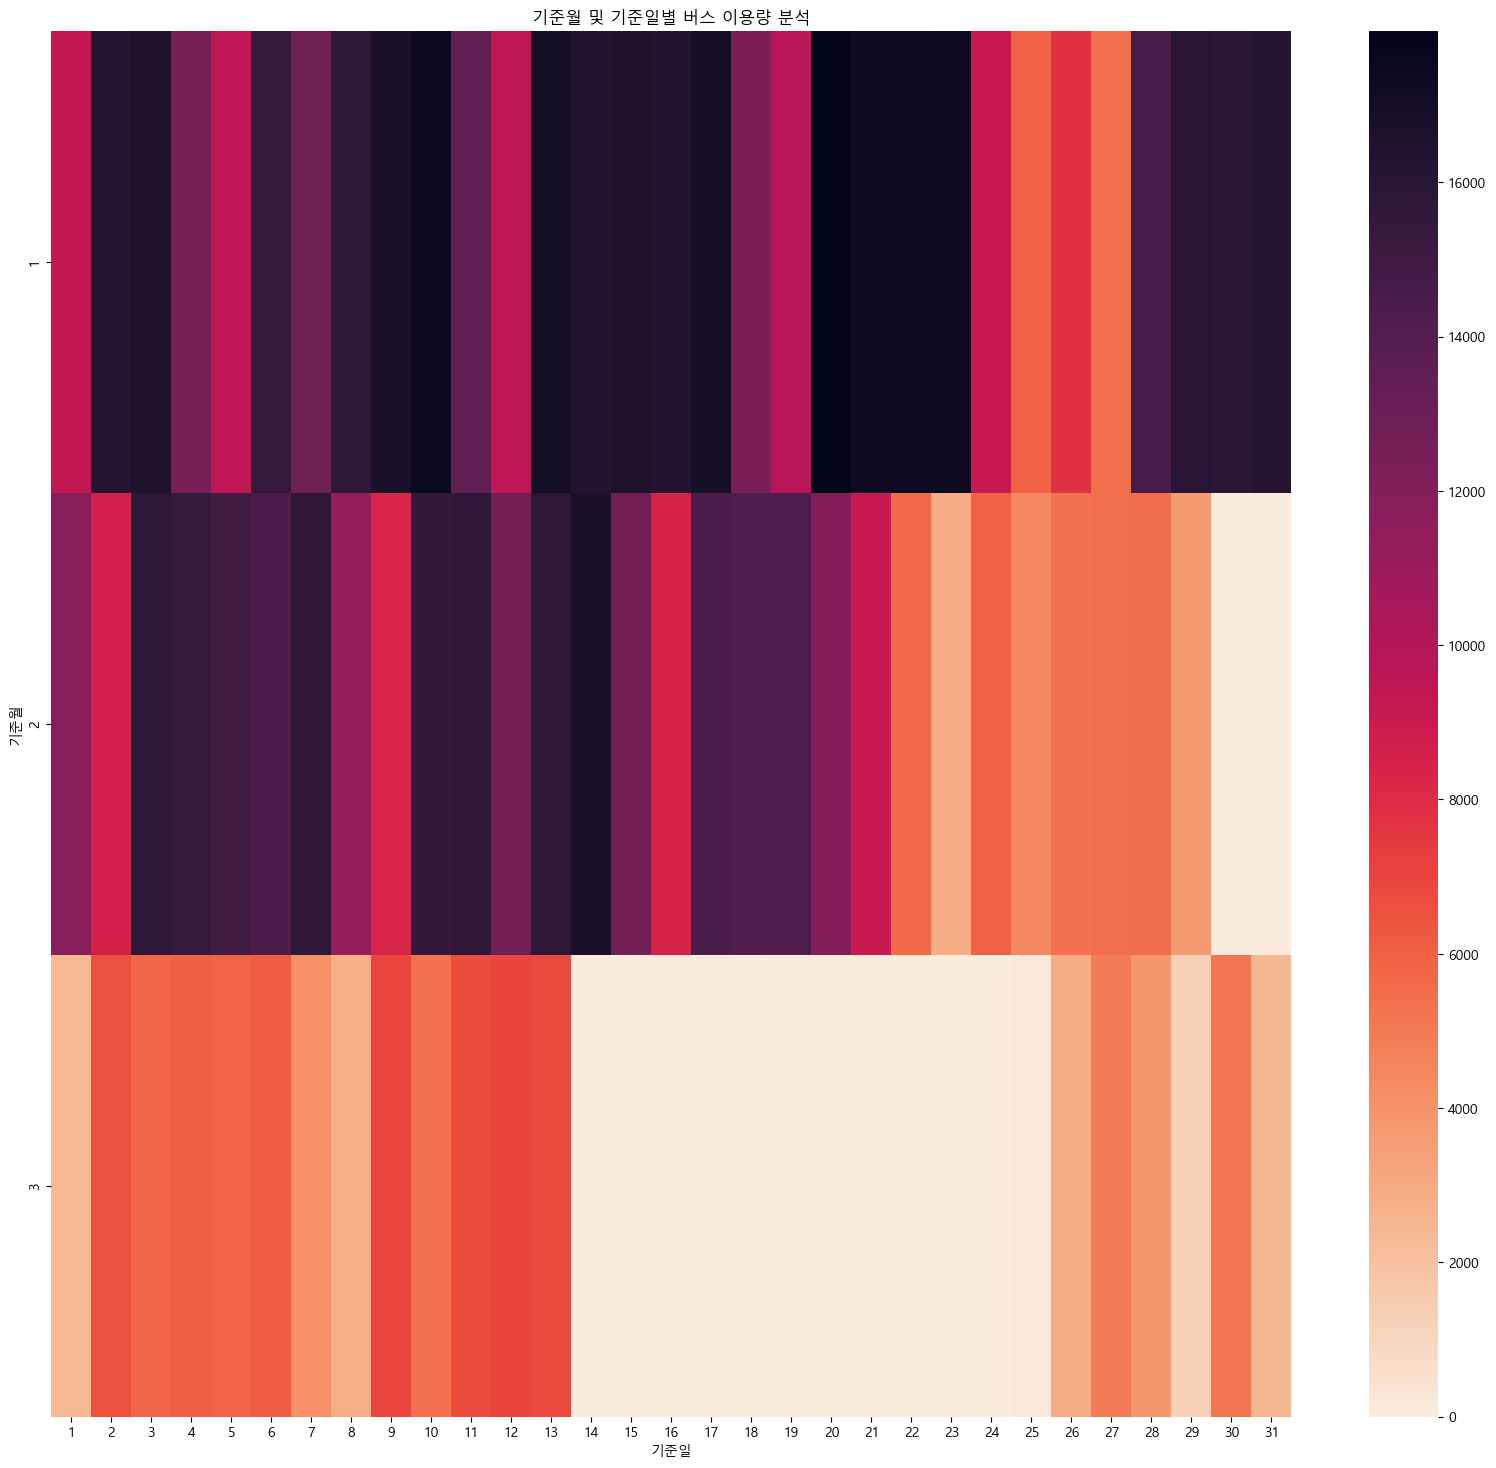

In [14]:
### 시각화
# 그래프 사이즈 지정 
# - 전체 그래프 사이즈 : figsize=(너비, 높이)
plt.figure(figsize=(20, 18))
# - 그래프 전체 제목 : title()
plt.title("기준월 및 기준일별 버스 이용량 분석")

### 히트맵 그리기
sns.heatmap(df_pivot, annot=False, fmt=".0f", cmap="rocket_r")

# - 그래프 보이고 메모리 지우기
plt.show()

### (해석)
# - 해당 현황은 3개월간의 데이터 현황으로, 
#   3개월 간의 데이터로 분석하는데는 타당성이 낮을 수 밖에 없으므로,
#   최소 3~5년간의 데이터 추가 확보를 한다면, 타당성 있는 분석이 가능할 것으로 여겨짐

### 다만, 3개월 데이터를 이용하여 현황을 확인한 결과
# - 1월에서 2월 중순까지 버스 이용량이 매우 높게 나타났으며,
#   2월 중순 이후에는 버스 이용량이 급격히 낮아지는 현상을 보이고 있음
# - 버스 이용량이 1월~2월 중순에 집중된 현상에 대한 추정
#   -> 포항 지역은 관광지역이라는 특수성에 의한  현상으로 여겨 질 수 있으며,
#   -> 이 기간은 초중고 학생들의 방학기간으로, 여행객들의 유입에 따른 
#      버스 이용량 증가로 추정할 수도 있음
#   -> 따라서, 추정에 대한 타당성을 위해서는
#      추가적으로 포항 관광지역의 관광객에 대한 유입 데이터를 확보하여
#      유입기간과 비교 분석한다면, 좀 더 명확한 확인이 가능할 것으로 여겨짐

### 히트맵 시각화 -> 함수로 정의하기

In [15]:
### 히트맵 시각화 함수
def viewHeatMap(df_pivot="", title="", annot=False) :
    # 그래프 사이즈 지정 
    # - 전체 그래프 사이즈 : figsize=(너비, 높이)
    plt.figure(figsize=(20, 18))
    # - 그래프 전체 제목 : title()
    plt.title(title)
    
    ### 히트맵 그리기
    sns.heatmap(df_pivot, annot=annot, fmt=".0f", cmap="rocket_r")
    
    # - 그래프 보이고 메모리 지우기
    plt.show()

### 피봇테이블 집계하는 기능을 함수로 정의

In [19]:
def getDf_Pivot(index="", columns=[], values=[], aggfunc="") :
    ### 집계함수 사용
    df_pivot = df_bus_card_tot.pivot_table(index   = index,
                                           columns = columns,
                                           values  = values,
                                           aggfunc = aggfunc)
    # - 결측데이터를 0으로 대체
    df_pivot = df_pivot.fillna(0)
    return df_pivot

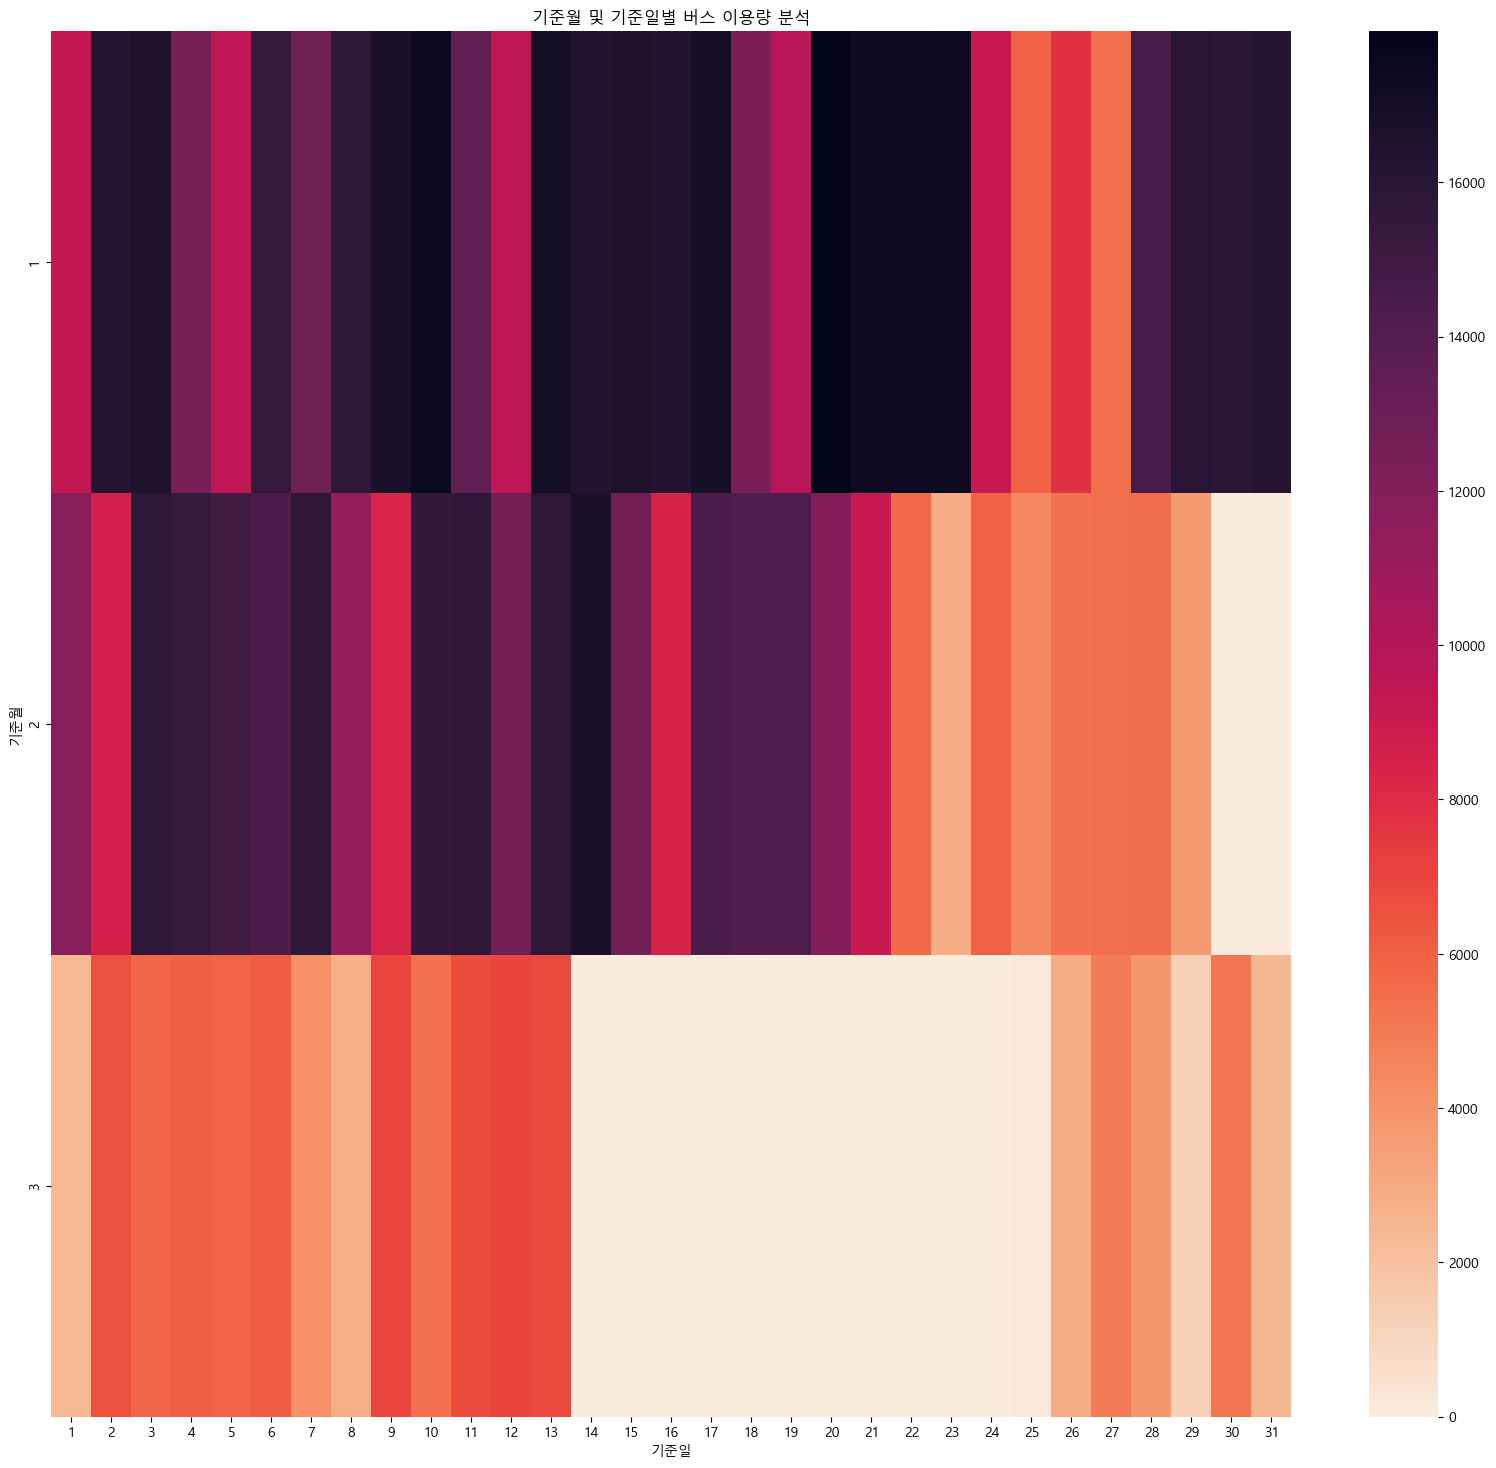

In [20]:
### 함수 테스트
# - 피봇 집계 데이터 
df_pivot = getDf_Pivot(index="기준월", columns="기준일", values="승객연령", aggfunc="count")
# - 히트맵 그리기
viewHeatMap(df_pivot=df_pivot, title="기준월 및 기준일별 버스 이용량 분석", annot=False)

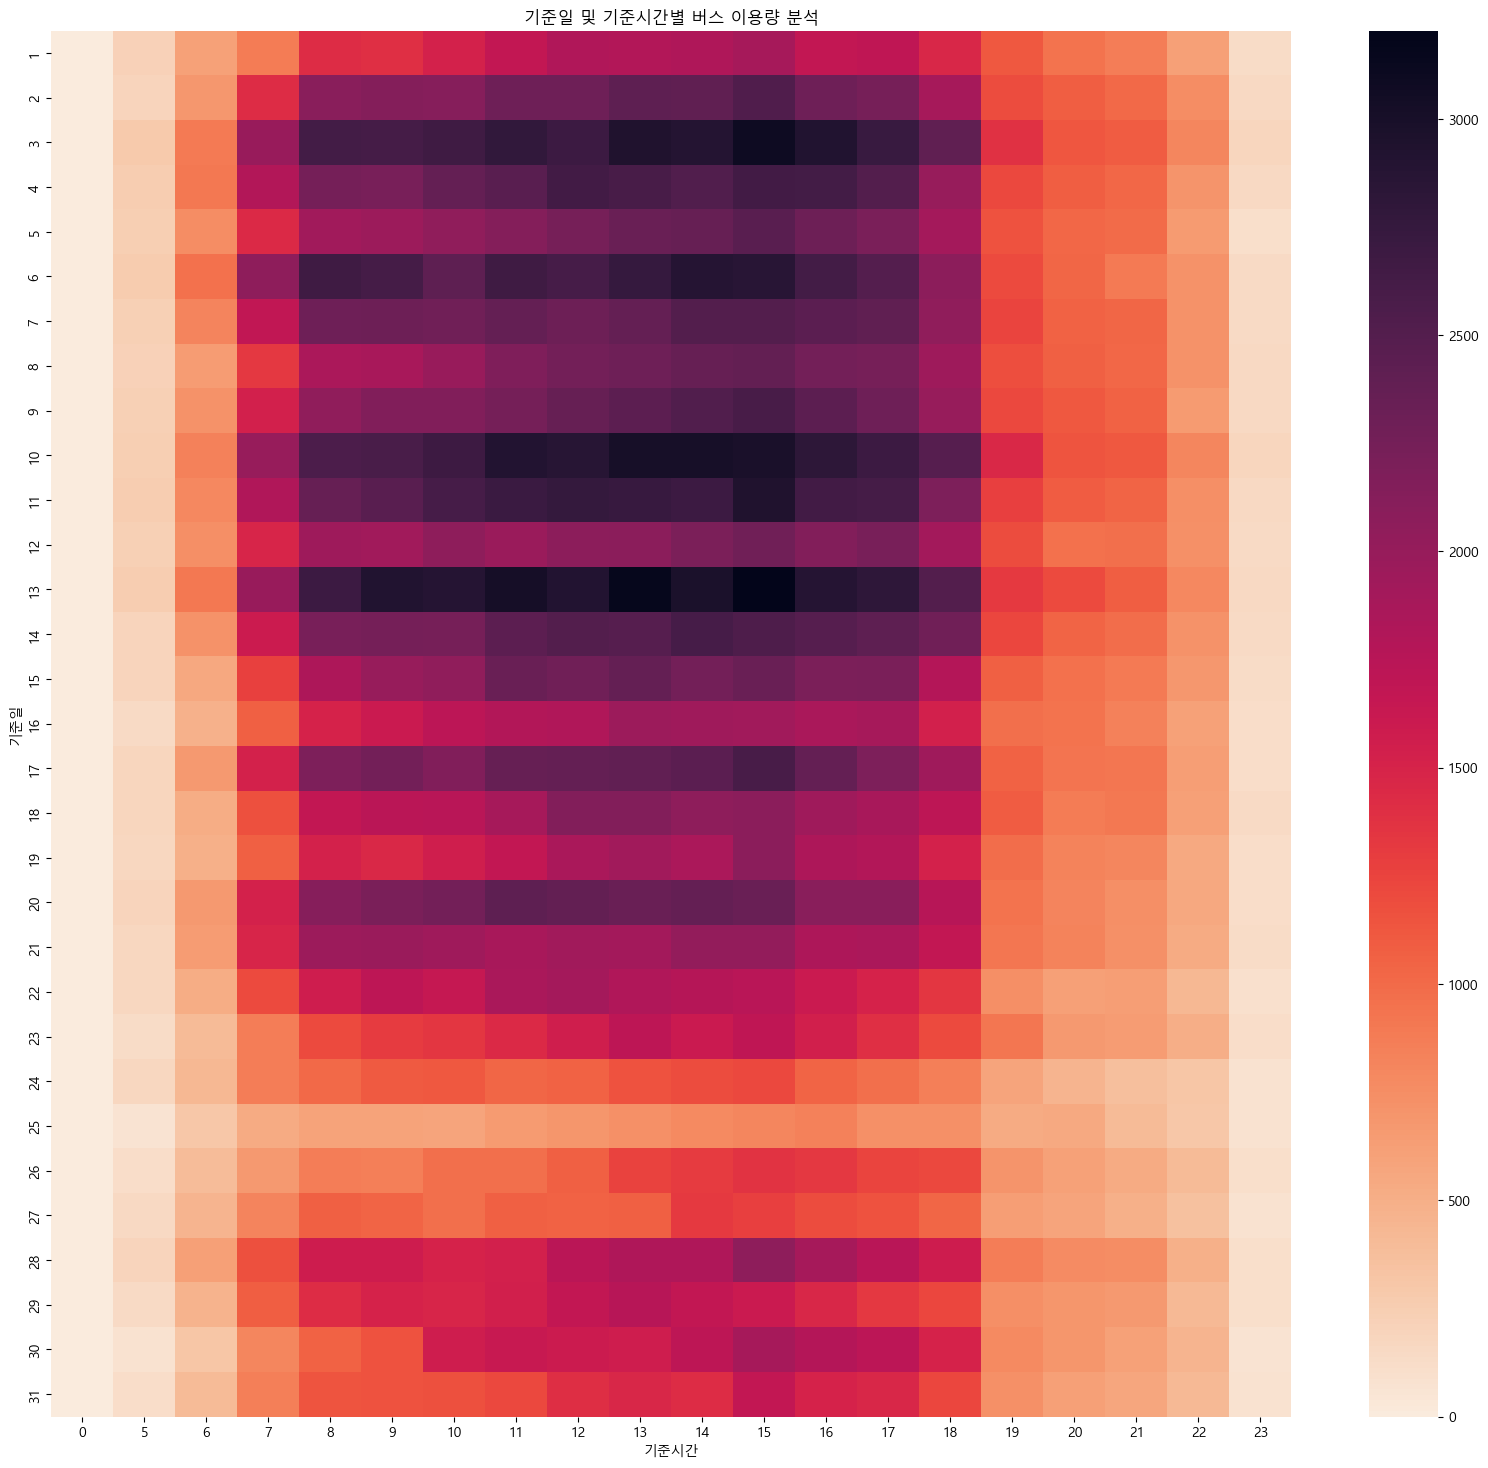

In [21]:
### 기준일 및 기준시간별 버스 이용량 분석
viewHeatMap(getDf_Pivot("기준일", "기준시간", "승객연령", "count"),
            "기준일 및 기준시간별 버스 이용량 분석")

### (해석)
# - 매일 오전 6시 30분부터 오후 6시 30분까지 많은 버스 이용량을 보이고 있음
# - 특이한 점은,
#   -> 출/퇴근 시간대의 이용량 보다 오후 시간대에 많은 이용자가 집중되는 현상을 보이고 있음
#   -> 일자를 기준으로 3일~13일 사이에 많은 이용자가 분포하고 있으며,
#   -> 시간을 기준으로 11시~15시 사이에 많은 이용자가 분포하고 있음
# - 출/퇴근 시간대에 많은 사용자가 나타날 것으로 추정될 수 있으나, 그렇지 않다는 점은
#   자가 차량을 이용한 경우, 또는 포항 지역의 기업 규모별 출/퇴근 차량 지원 등을 고려하기 위한
#   추가 데이터 수집을 통해 버스 이용자의 상세한 분석이 필요함

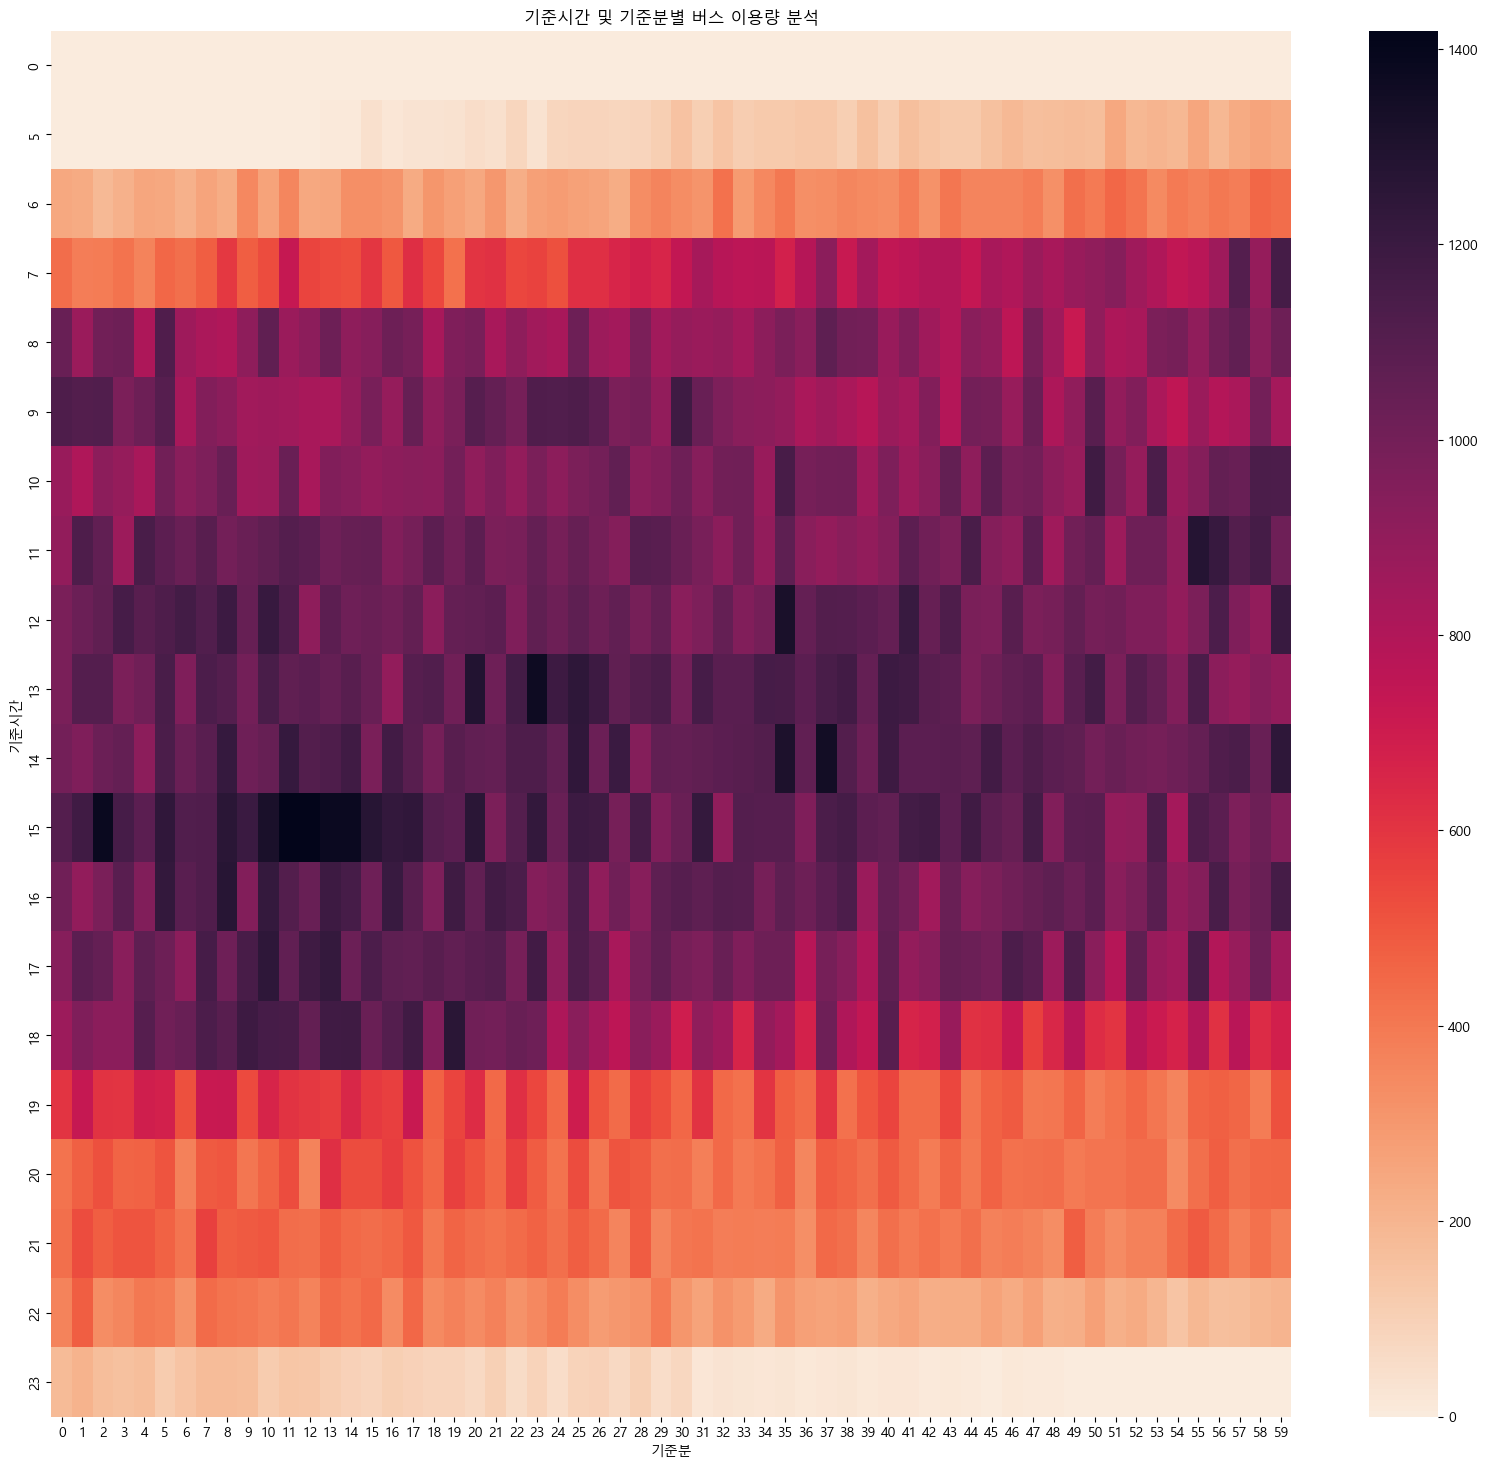

In [22]:
### 기준시간 및 기준분 버스 이용량 분석
viewHeatMap(getDf_Pivot("기준시간", "기준분", "승객연령", "count"),
            "기준시간 및 기준분별 버스 이용량 분석")

### (해석)
# - 출근 시간대는 7시 30분을 기점으로 이용량이 점진적으로 증가하고 있음
# - 퇴근 시간대는 6시 19분에 가장 이용량이 많으며, 7시전으로 이용량이 점진적으로 낮아지고 있음
# - 이용자가 집중된 시간대는 오전 11시~오후15시 사이로
#   -> 가장 집중된 시간대는 오후 15시 11분~15분 사이에 매우 많은 이용자가 일시적으로 많아지고 있음
# - 추가 분석 사항 : 지역 내외 이용자 현황, 연령별 이용자 현황, 오후 시간대 이용자 유형

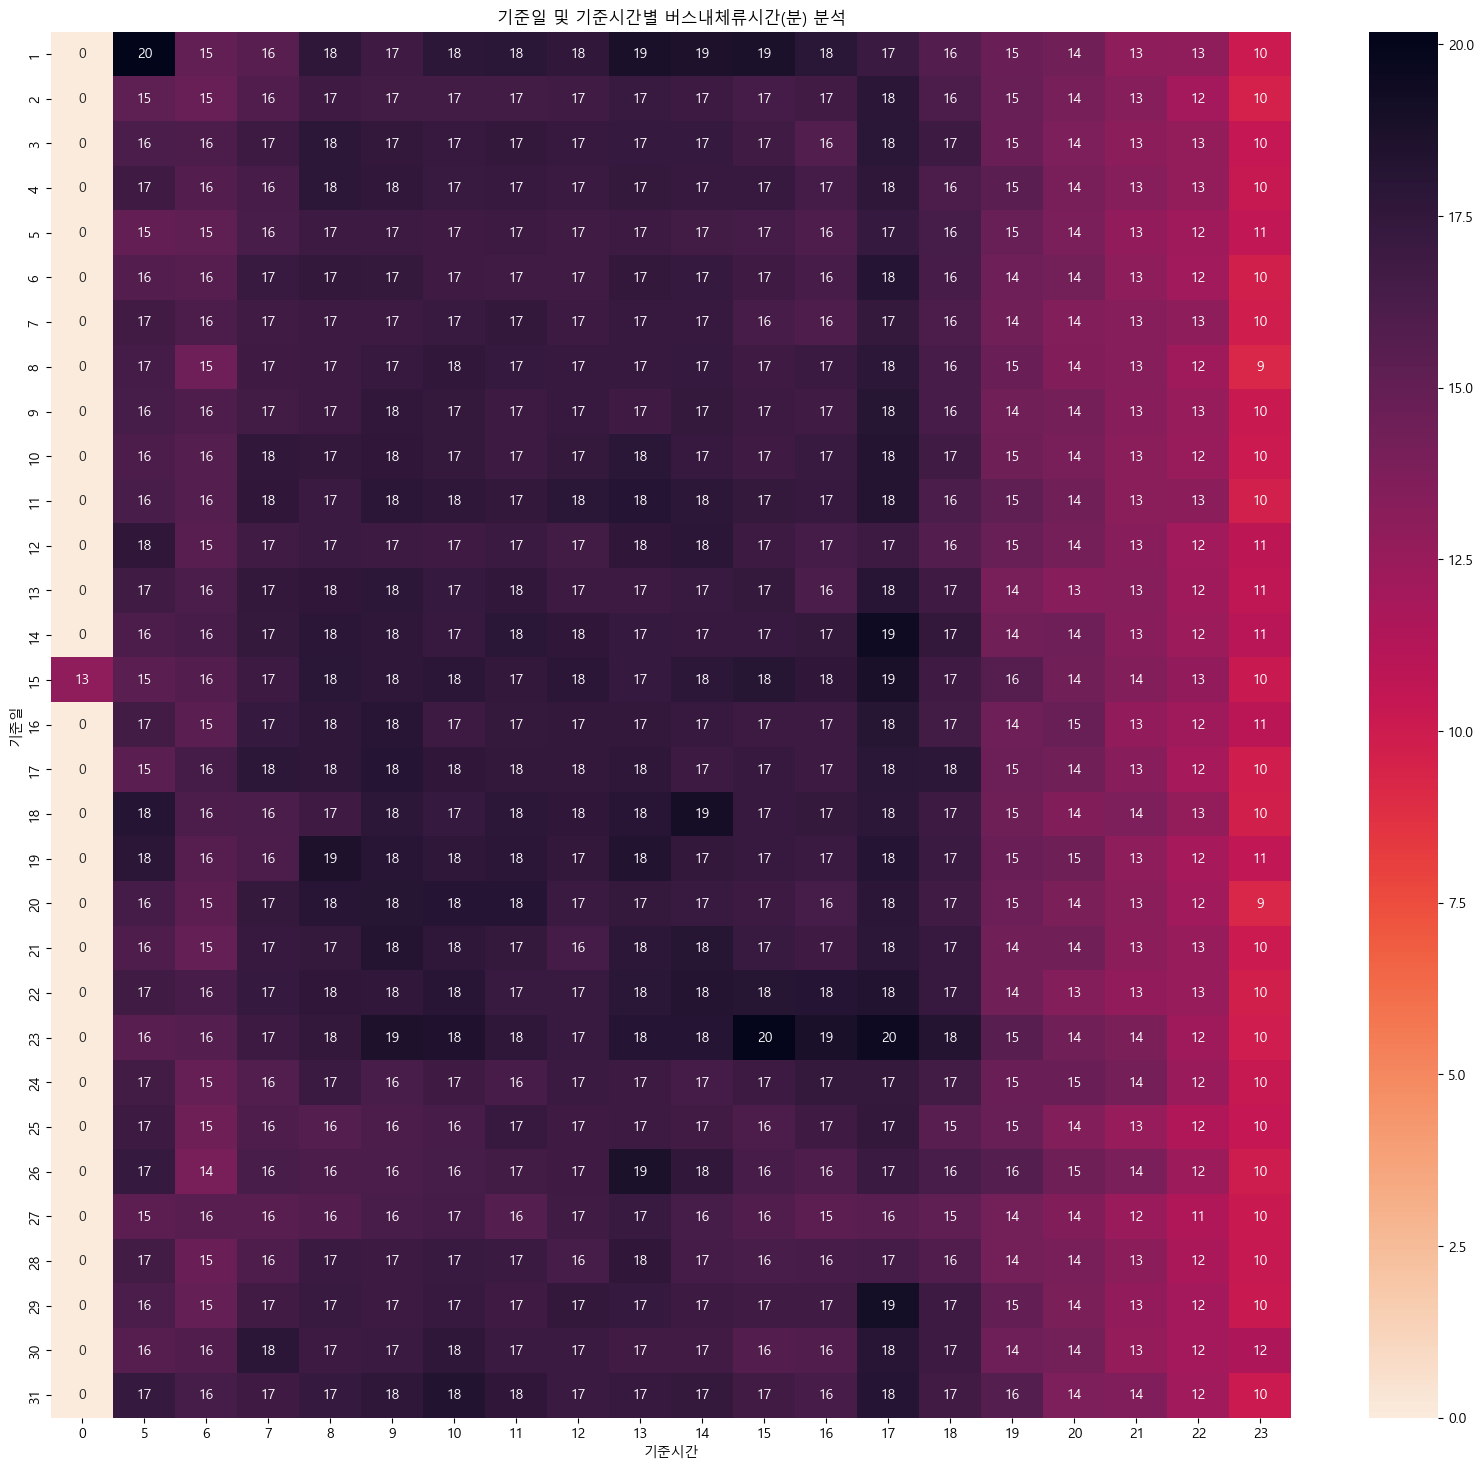

In [23]:
### 기준일 및 기준시간별 버스내체류시간(분) 분석
viewHeatMap(getDf_Pivot("기준일", "기준시간", "버스내체류시간(분)", "mean"),
            "기준일 및 기준시간별 버스내체류시간(분) 분석", annot=True)

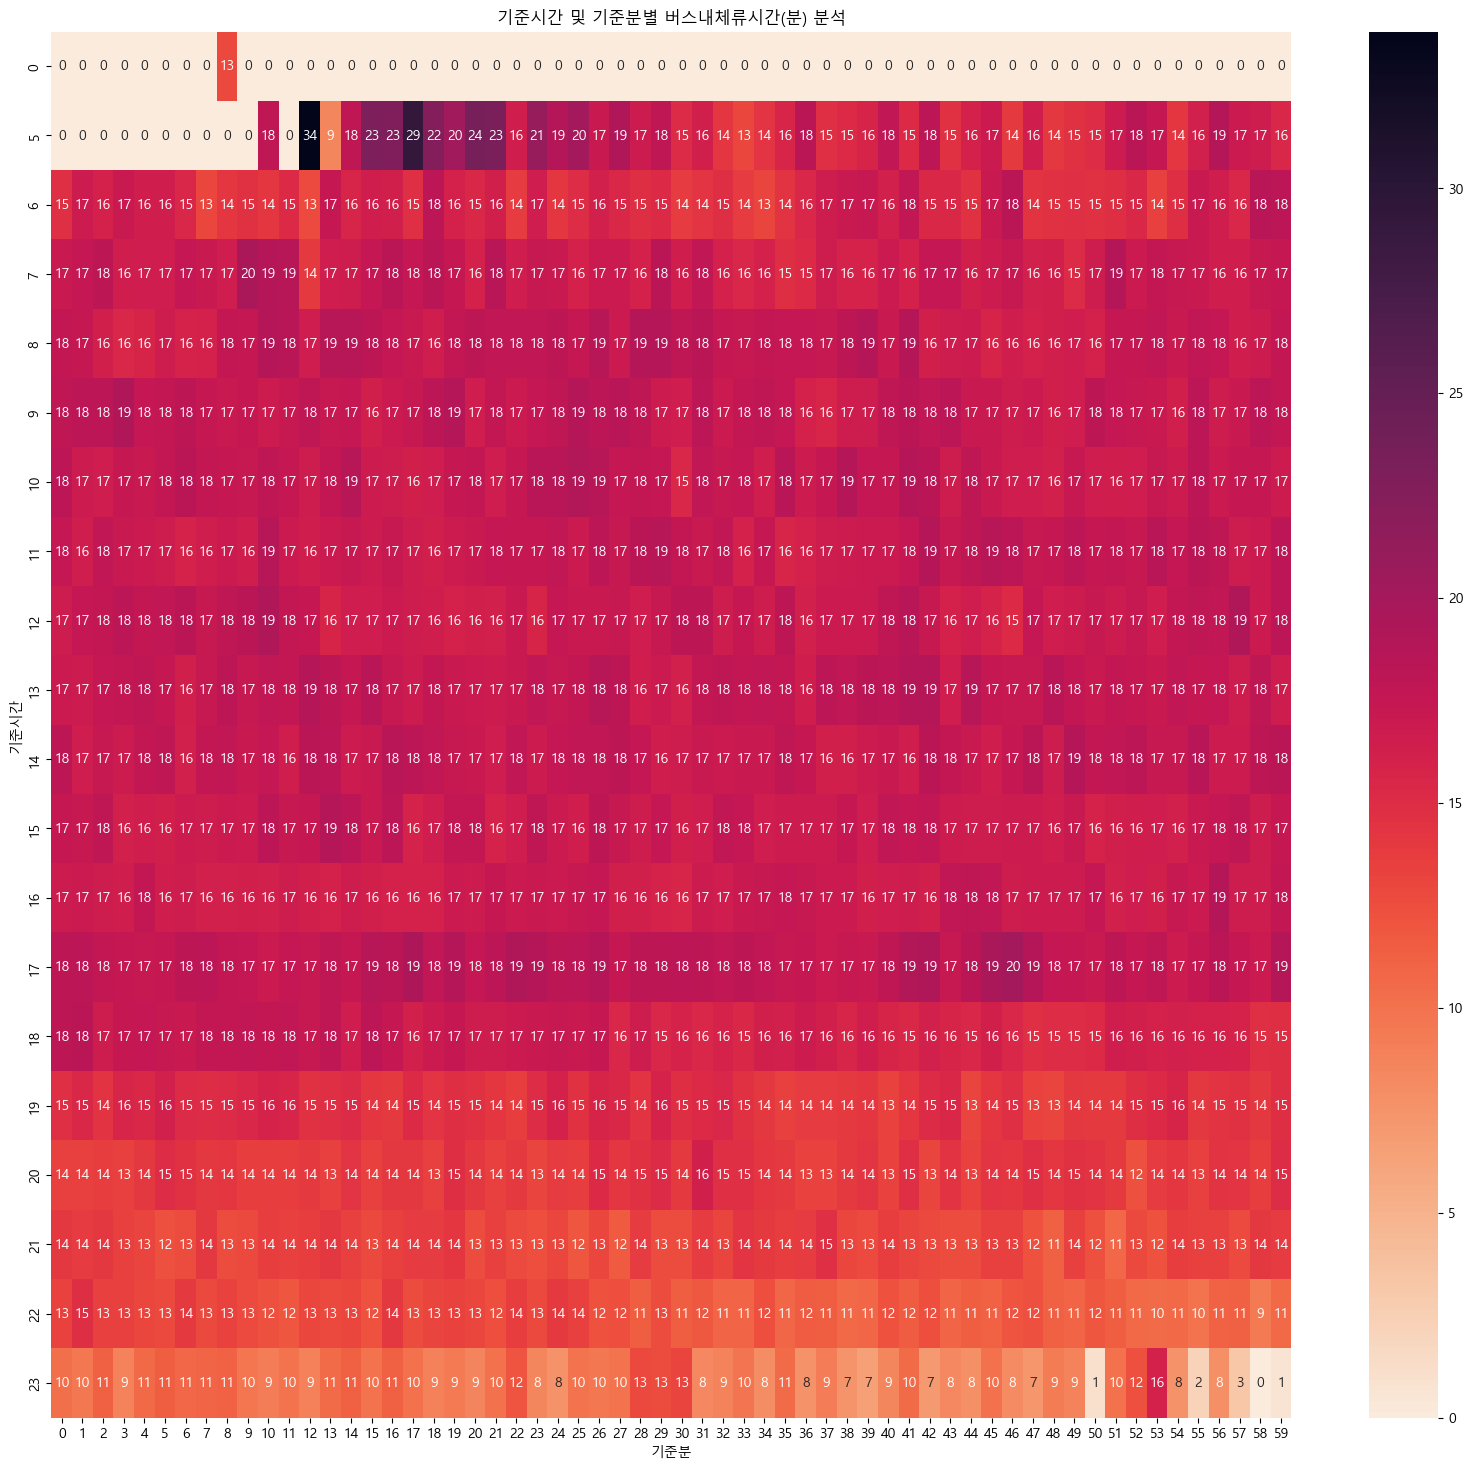

In [24]:
### 기준시간 및 기준분별 버스내체류시간(분) 분석
viewHeatMap(getDf_Pivot("기준시간", "기준분", "버스내체류시간(분)", "mean"),
            "기준시간 및 기준분별 버스내체류시간(분) 분석", annot=True)

In [27]:
### 시간대별 승객연령별 버스내체류시간(분) 현황 분석
df_bus_card_tot.head(1)

# 승객연령별 빈도 확인하기 : 빈도분석
df_bus_card_tot["승객연령"].value_counts()

승객연령
일반     772599
청소년     59037
어린이     10047
Name: count, dtype: int64

In [29]:
### 막대그래프로 그리기
# - 사용할 데이터 3개 : 기준시간, 승객연령, 버스내체류시간(분)
# - 필요한 컬럼들을 별도의 데이터프레임으로 저장해서 사용
df_temp = df_bus_card_tot[["기준시간", "승객연령", "버스내체류시간(분)"]].copy()
df_temp.head(2)
len(df_temp)

842608

In [32]:
### 시간 및 승객구분별 버스내체류시간(분) 집계하기
# - 그래프 : 막대그래프
df_temp2 = df_temp.groupby(["기준시간", "승객연령"]).sum()
df_temp2

버스내체류시간(분)
기준시간 승객연령            
0    일반         12.93
5    어린이       152.12
     일반      94647.44
     청소년      2897.19
6    어린이       712.77
     일반     286988.34
     청소년     13881.18
7    어린이      3520.94
     일반     648023.50
     청소년     38780.76
8    어린이      7341.05
     일반     910769.28
     청소년     39688.02
9    어린이      8834.51
     일반     938277.61
     청소년     42069.05
10   어린이     10425.02
     일반     942751.68
     청소년     50939.20
11   어린이     12646.40
     일반     981817.91
     청소년     63054.02
12   어린이     14847.81
     일반     983094.10
     청소년     80840.85
13   어린이     16687.73
     일반    1031291.25
     청소년     87390.24
14   어린이     16344.69
     일반    1040204.89
     청소년     77838.57
15   어린이     14266.86
     일반    1056674.44
     청소년     83217.81
16   어린이     15597.86
     일반     951082.64
     청소년     90185.74
17   어린이     14540.63
     일반     975528.48
     청소년     98164.80
18   어린이     10214.98
     일반     796108.03
     청소년     73397.19
19   어린이      6316.64
     일반     416206.32
     청소년     44732.34
20   어린이      5174.41
     일반     341758.21
     청소년     38437.69
21   어린이      3404.90
     일반     299263.68
     청소년     37287.53
22   어린이      2636.52
     일반     200354.69
     청소년     24907.53
23   어린이       154.96
     일반      37165.81
     청소년      2493.28

In [36]:
df_temp3 = df_temp2.sort_values(by=["버스내체류시간(분)"], ascending=False)
df_temp3

,,버스내체류시간(분)
기준시간,승객연령,
15,일반,1056674.44
14,일반,1040204.89
13,일반,1031291.25
12,일반,983094.10
11,일반,981817.91
17,일반,975528.48
16,일반,951082.64
10,일반,942751.68
9,일반,938277.61


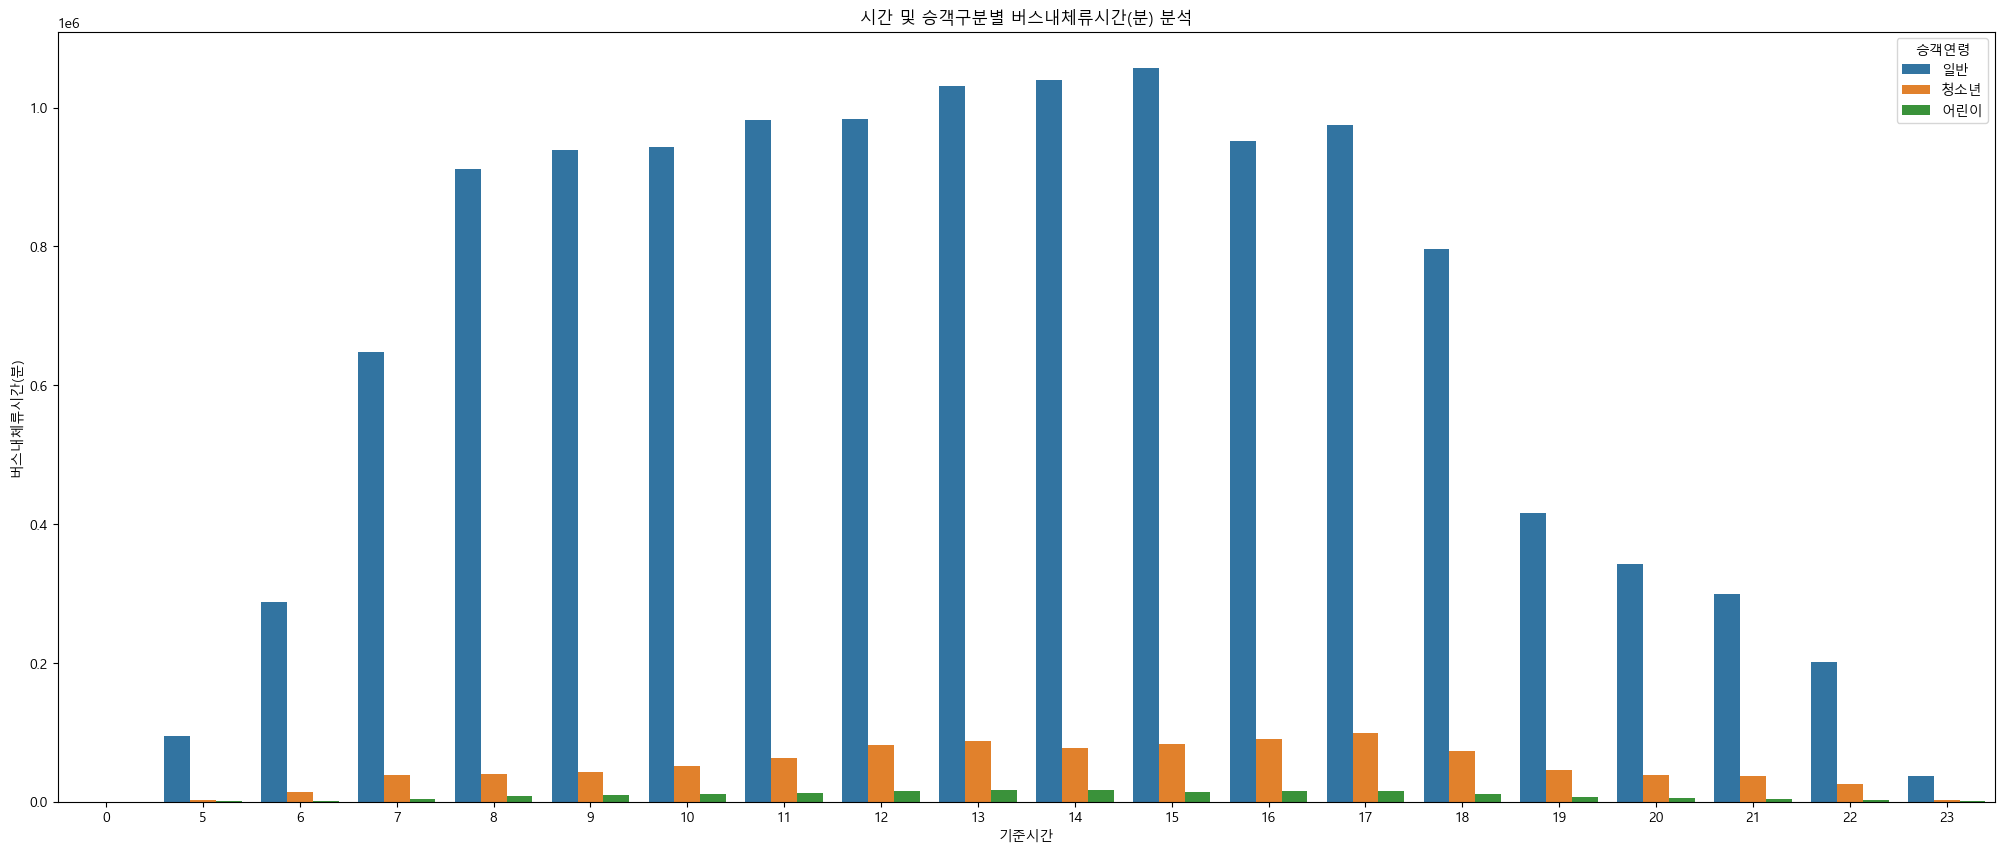

In [37]:
### 막대그래프 그리기
# 그래프 전체 사이즈
plt.figure(figsize=(25, 10))
# 그래프 전체 제목
plt.title("시간 및 승객구분별 버스내체류시간(분) 분석")

# 막대그래프 그리기
sns.barplot(x="기준시간", y="버스내체류시간(분)", hue="승객연령", data=df_temp3)

# 그래프 보이고, 메모리 비우기
plt.show()

In [39]:
### 어느 구간에서 체류시간이 많은지 확인
df_bus_card_tot.head(1)
# 별로 데이터프레임으로 사용할 컬럼 추출
df_temp4 = df_bus_card_tot[["승하차구간", "버스내체류시간(분)"]].copy()
df_temp4.head(2)

,승하차구간,버스내체류시간(분)
0,양덕차고지->동부초등학교,7.92
1,문덕사거리->새마을금고해도지점,32.18


In [42]:
### 그룹 함수를 이용해서 승하차구간별로 체류시간을 sum하기
# - as_index=False : 그룹 형태를 -> 데이터프레임 형태로 index 영역을 컬럼으로 올립니다.
df_temp5 = df_temp4.groupby(["승하차구간"], as_index=False).sum()
df_temp5

,승하차구간,버스내체류시간(분)
0,GS슈퍼마켓->GS슈퍼마켓,9.79
1,GS슈퍼마켓->HCN경북방송,581.88
2,GS슈퍼마켓->KT&G,181.81
3,GS슈퍼마켓->KTX포항역(흥해행),810.09
4,GS슈퍼마켓->LG빌라입구,66.01
...,...,...
27432,흥환리->신정,2137.83
27433,흥환리->약전,435.05
27434,흥환리->영남상가,789.31
27435,흥환리->임곡1리,39.00


In [46]:
### 정렬하기 : 내림차순
# - 가장 체류시간이 높은 Top 30건만 추출하여 시각화에 사용
df_top30 = df_temp5.sort_values(by=["버스내체류시간(분)"], ascending=False).head(30)
df_top30

,승하차구간,버스내체류시간(분)
14059,시외버스터미널->죽도시장,107186.11
27379,흥해환승센터->죽도시장,66116.34
27385,흥해환승센터->중앙상가,48417.60
21204,죽도시장->흥해환승센터,44503.33
13820,시외버스터미널->구룡포환승센터,41560.22
7737,두호초등학교->죽도시장,41363.99
8835,문덕사거리->시외버스터미널,41164.76
2565,구룡포근대화거리->시외버스터미널,40809.91
20194,장성초등학교->죽도시장,39614.05
1444,경북자동차학원->죽도시장,38300.98


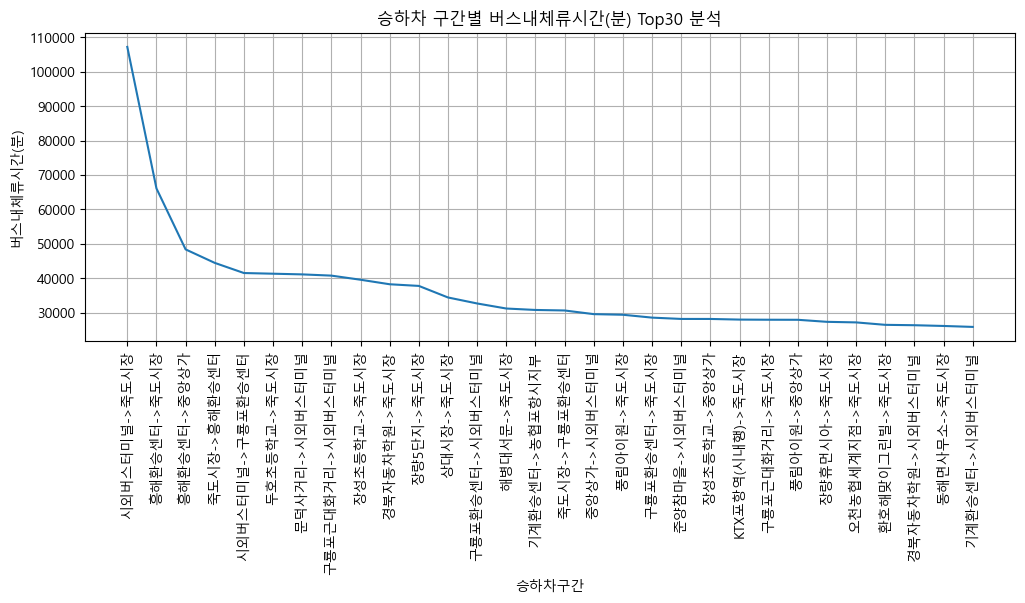

In [52]:
### 선 그래프 그리기
# 그래프 사이즈
plt.figure(figsize=(12, 4))
# 전체 제목
plt.title("승하차 구간별 버스내체류시간(분) Top30 분석")

# 선그래프 그리기
plt.plot(df_top30["승하차구간"], df_top30["버스내체류시간(분)"])

# x축, y축 이름 넣기
plt.xlabel("승하차구간")
plt.ylabel("버스내체류시간(분)")

# x축의 범위 값이 중복되어 있음 -> 각도를 이용해서 텍스트 모야 회전
plt.xticks(rotation=90)

# 모눈선 그리기
plt.grid()

# 보이고 메모리 비우기
plt.show()